# Loss functions

## Dot product.

In [5]:
import numpy as np

x = np.arange(3)
print(x)

y = np.arange(3, 6)
print(y)

print(x*y)


[0 1 2]
[3 4 5]
[ 0  4 10]


In [7]:
# dot product
print(np.sum(x*y))

# convenient python notation is @ 
print(x@y)

14
14


## Linear classifier prediction

* `raw model output = coefficients @ features + intercept`
* linear classifier prediction: compute raw model output, check the sign:
    * if positive, predict one class
    * if negative, predict other class
* same for logistic regression and linear svm
    * `fit` is different (due to loss function) but `predict` is the same

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object
log_reg = LogisticRegression(max_iter=10000)

# Fit the logistic regression model
log_reg.fit(X_train, y_train)

# Predict on examples 10 and 20
example_10 = X_test[10].reshape(1, -1)
example_20 = X_test[20].reshape(1, -1)
prediction_10 = log_reg.predict(example_10)
prediction_20 = log_reg.predict(example_20)

print(f"Prediction for example 10: {prediction_10[0]}")
print(f"Prediction for example 20: {prediction_20[0]}")

Prediction for example 10: 1
Prediction for example 20: 1


In [10]:
# predict on rows 10 and 20
print(log_reg.predict(X)[10])
print(log_reg.predict(X)[20])

0
1


In [11]:
# learned coefficients and intercept
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.coef_.shape)
print(log_reg.intercept_.shape)

[[ 0.96846874  0.2255632  -0.36765849  0.02642457 -0.15153023 -0.230788
  -0.51574698 -0.26977593 -0.22059366 -0.03707385 -0.09194474  1.38836815
  -0.15935634 -0.08938577 -0.02163521  0.04165381 -0.04797337 -0.031118
  -0.03347486  0.01074263  0.10377256 -0.51437364 -0.01739577 -0.01660445
  -0.29967657 -0.77062574 -1.41159249 -0.49050461 -0.72334123 -0.102019  ]]
[29.54759658]
(1, 30)
(1,)


In [13]:
# should be the same as log_reg.predict(X)[10]  by looking at signs (pos/neg)- raw model output
print(log_reg.coef_ @ X[10] + log_reg.intercept_) 
print(log_reg.coef_ @ X[20] + log_reg.intercept_)

[-6.17984611]
[5.41210687]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def plot_decision_boundary(X, y, model):
    # Define the range of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


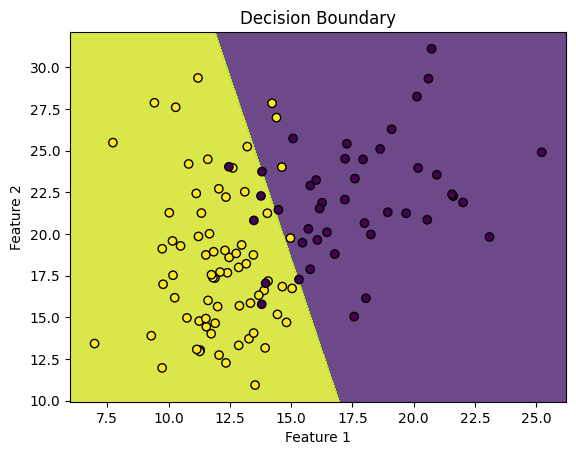

In [16]:

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Use only the first two features for visualization
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object
log_reg = LogisticRegression(max_iter=10000)

# Fit the logistic regression model
log_reg.fit(X_train, y_train)

# Plot the decision boundary
plot_decision_boundary(X_test, y_test, log_reg)

## Loss function 

Machine learning is about minimising loss, e.g. minimisation basedon coefficients and/or parameters.
* Squared loss for regression
* Number of errors - for classification - the `0-1` loss -> hard to minimise in practice so is not used by logistic regression and svm.


In [17]:
# minimising a loss
from scipy.optimize import minimize
minimize(np.square, 0).x # 0 is the initial guess

array([0.])

In [22]:
minimize(np.square, 12).x # 12 is the initial guess

array([-1.13307839e-07])

The minimize function in the scipy.optimize module is used to minimize a given function. Here's a breakdown of the code snippet `minimize(np.square, 2).x`:

**Function to Minimize**: np.square

This is the function we want to minimize. np.square computes the square of its input, i.e., ( f(x) = x^2 ).

**Initial Guess**: 2

This is the starting point for the minimization algorithm. The algorithm will start searching for the minimum value of the function from this initial guess.

**minimize Function**: minimize(np.square, 2)

This calls the minimize function from the scipy.optimize module, which attempts to find the minimum value of the np.square function starting from the initial guess 2.

**Result Attribute**: .x

The result of the minimize function is an object that contains various information about the optimization process. The .x attribute specifically contains the value of the variable that minimizes the function.
Putting it all together, minimize(np.square, 2).x will return the value of x that minimizes the function ( f(x) = x^2 ), starting from the initial guess 2. Since the minimum value of ( x^2 ) is 0 (achieved when ( x = 0 )), the result will be 0.

In [ ]:
# loss function
def my_loss1(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

In [23]:
import numpy as np
from scipy.optimize import minimize
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the Boston house dataset
data = load_boston()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the custom loss function
def my_loss2(coeffs, X, y):
    predictions = X.dot(coeffs)
    return np.sum((predictions - y) ** 2)

# Initial guess for the coefficients
initial_guess = np.zeros(X_train.shape[1])

# Minimize the custom loss function
result = minimize(my_loss2, initial_guess, args=(X_train, y_train))
custom_coeffs = result.x

# Fit the LinearRegression model from scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
sklearn_coeffs = lin_reg.coef_

# Compare the coefficients
print("Custom coefficients:", custom_coeffs)
print("Scikit-learn coefficients:", sklearn_coeffs)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


## Linear regression loss diagram

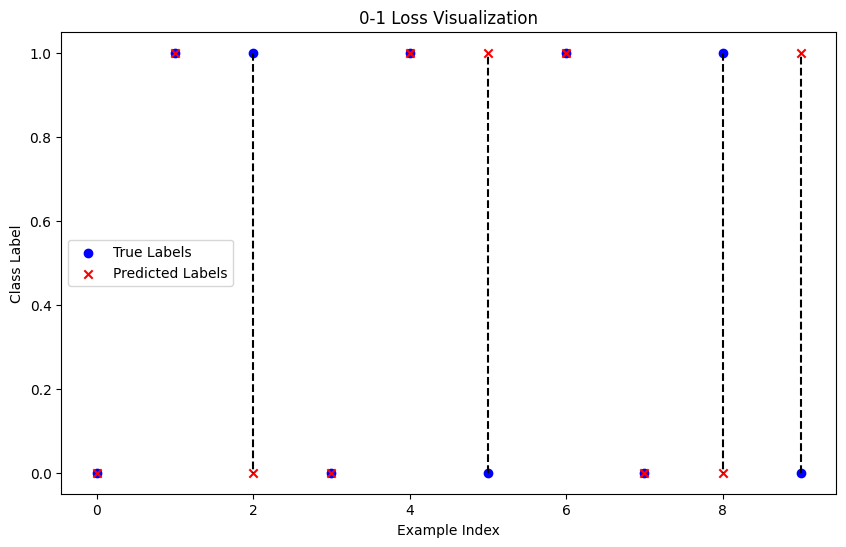

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 0-1 loss function
def zero_one_loss(y_true, y_pred):
    return np.where(y_true == y_pred, 0, 1)

# Generate some example data
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1])

# Calculate the 0-1 loss
loss = zero_one_loss(y_true, y_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_true)), y_true, color='blue', label='True Labels')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Labels', marker='x')
for i in range(len(y_true)):
    if loss[i] == 1:
        plt.plot([i, i], [y_true[i], y_pred[i]], color='black', linestyle='--')

plt.xlabel('Example Index')
plt.ylabel('Class Label')
plt.title('0-1 Loss Visualization')
plt.legend()
plt.show()

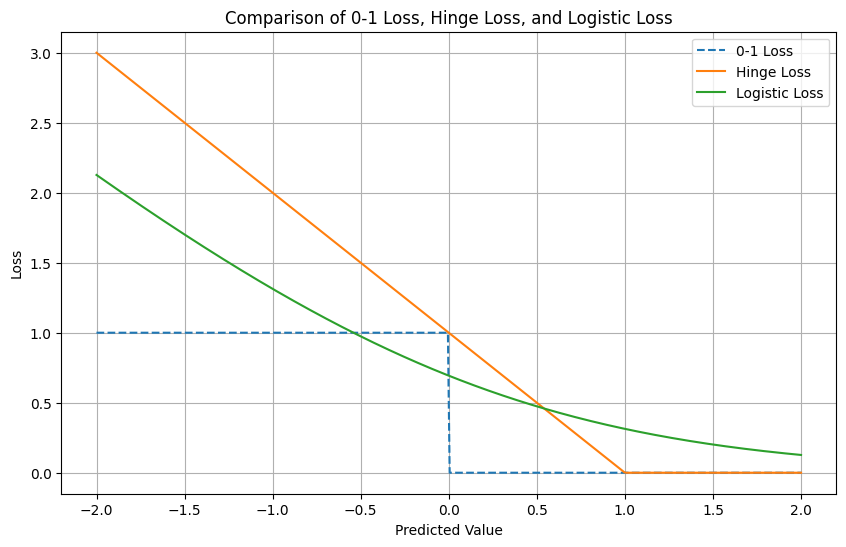

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 0-1 loss function
def zero_one_loss(y_true, y_pred):
    return np.where(y_true == y_pred, 0, 1)

# Define the hinge loss function
def hinge_loss(y_true, y_pred):
    return np.maximum(0, 1 - y_true * y_pred)

# Define the logistic loss function
def logistic_loss(y_true, y_pred):
    return np.log(1 + np.exp(-y_true * y_pred))

# Generate a range of prediction values
y_pred = np.linspace(-2, 2, 400)
y_true = 1  # Assume the true label is 1 for simplicity

# Calculate the losses
zero_one = zero_one_loss(y_true, np.sign(y_pred))
hinge = hinge_loss(y_true, y_pred)
logistic = logistic_loss(y_true, y_pred)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(y_pred, zero_one, label='0-1 Loss', linestyle='--')
plt.plot(y_pred, hinge, label='Hinge Loss')
plt.plot(y_pred, logistic, label='Logistic Loss')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.title('Comparison of 0-1 Loss, Hinge Loss, and Logistic Loss')
plt.legend()
plt.grid(True)
plt.show()

### 0-1 Loss
- **Definition**: The 0-1 loss function is defined as:
  \[
  L_{0-1}(y_{\text{true}}, y_{\text{pred}}) = \begin{cases} 
  0 & \text{if } y_{\text{true}} = y_{\text{pred}} \\
  1 & \text{if } y_{\text{true}} \neq y_{\text{pred}}
  \end{cases}
  \]
- **Interpretation**: It assigns a loss of `0` if the prediction is correct and `1` if the prediction is incorrect.
- **Visualization**: In the plot, the 0-1 loss is represented as a step function (dashed line). It is `0` when the predicted value is on the correct side of the decision boundary (i.e., positive for a true label of `1`), and `1` otherwise.

### Hinge Loss
- **Definition**: The hinge loss function is commonly used in Support Vector Machines (SVMs) and is defined as:
  \[
  L_{\text{hinge}}(y_{\text{true}}, y_{\text{pred}}) = \max(0, 1 - y_{\text{true}} \cdot y_{\text{pred}})
  \]
- **Interpretation**: It penalizes predictions that are not only incorrect but also those that are correct but not confident enough. The loss is `0` if the prediction is correct and confident (i.e., \( y_{\text{true}} \cdot y_{\text{pred}} \geq 1 \)), and increases linearly as the prediction becomes less confident or incorrect.
- **Visualization**: In the plot, the hinge loss is represented as a piecewise linear function. It is `0` for confident correct predictions and increases linearly for less confident or incorrect predictions.

### Logistic Loss
- **Definition**: The logistic loss function, also known as the log loss or cross-entropy loss, is defined as:
  \[
  L_{\text{logistic}}(y_{\text{true}}, y_{\text{pred}}) = \log(1 + \exp(-y_{\text{true}} \cdot y_{\text{pred}}))
  \]
- **Interpretation**: It provides a smooth approximation to the 0-1 loss and is used in logistic regression. The loss is small for confident correct predictions and increases smoothly as the prediction becomes less confident or incorrect.
- **Visualization**: In the plot, the logistic loss is represented as a smooth curve. It is close to `0` for confident correct predictions and increases smoothly for less confident or incorrect predictions.

### Plot Explanation
- **X-axis**: Represents the predicted value (`y_pred`).
- **Y-axis**: Represents the loss value.
- **Curves**:
  - **0-1 Loss (dashed line)**: Shows a step function that jumps from `0` to `1` at the decision boundary.
  - **Hinge Loss**: Shows a piecewise linear function that is `0` for confident correct predictions and increases linearly for less confident or incorrect predictions.
  - **Logistic Loss**: Shows a smooth curve that approximates the 0-1 loss, with a gradual increase for less confident or incorrect predictions.

The plot helps visualize how different loss functions penalize incorrect predictions and how they handle the confidence of predictions. The 0-1 loss is very strict, while the hinge and logistic losses provide smoother gradients that are useful for optimization in machine learning algorithms.

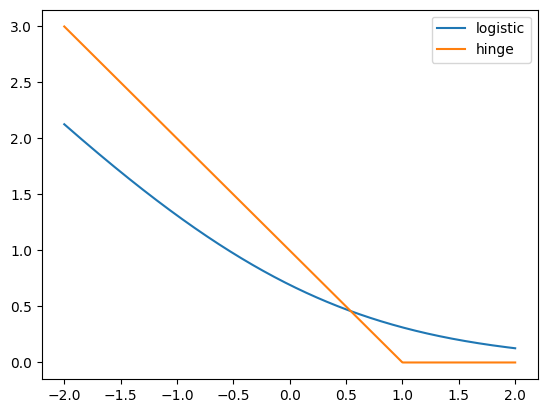

In [28]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()